In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Import Data
df = pd.read_csv('Data_Benzene_Reduced.csv', sep=";", header=None)
df.shape

(36, 50)

In [116]:
df.rename(columns={0: 'benzene', 1: 'eq_ratio'}, inplace=True)

In [117]:
grid_shape = (6,8) # new grid size wrt statement due to NaNs

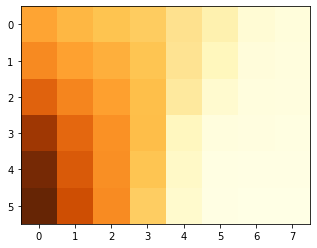

In [199]:
T = df.iloc[:,2:].to_numpy()
T_test = []
T_0 = np.flip(T[0,:].reshape(grid_shape),axis=0)
for i in range (T.shape[0]):
    T_reshaped = np.flip(T[i,:].reshape(grid_shape),axis=0)
    #print(T_reshaped)
    T_test.append(T_reshaped)

    #plt.imshow(T_reshaped, cmap='YlOrBr')
    #plt.show()
plt.imshow(T_0, cmap='YlOrBr')
plt.show()    
T_test = np.array(T_test)

Text(0, 0.5, 'Variance ratio')

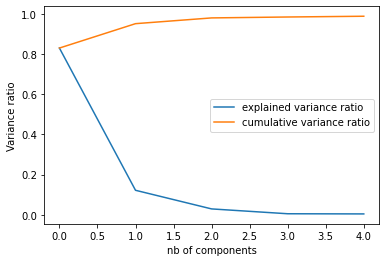

In [180]:
from sklearn.decomposition import PCA
index = 0
pca = PCA(n_components=5)
pca.fit(T)

#explained_var_ratio = pca.explained_variance_ratio_
#plt.plot(explained_var_ratio)
#plt.show()


# plot of the explained variance by PCs and the cumulative variance ratio :  3 comp. explain up to 80% of the total variance
plt.plot(explained_var_ratio, label = "explained variance ratio")
plt.plot(np.cumsum(explained_var_ratio),label = "cumulative variance ratio")
plt.legend(loc="center right")
plt.xlabel('nb of components')
plt.ylabel('Variance ratio')

(48, 5)


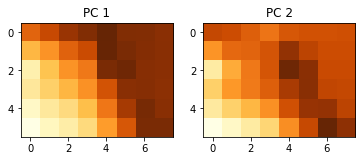

In [252]:
A = pca.components_.T
Z = np.flip(T,axis=0)@A # X*A
print(A.shape)


n_pcs = 2
fig, axs = plt.subplots(1,n_pcs, figsize=(3*n_pcs, 3))
for i, ax in enumerate(axs):
    ax.imshow(A[:,i].reshape(grid_shape), cmap='YlOrBr') # to check, the flip
    ax.set_title('PC ' + str(i+1))

In [267]:
loadings = pd.DataFrame(A[:,:2], columns=['PC1', 'PC2'])
loadings.head()

,PC1,PC2
0,-0.131056,0.123520
1,-0.113494,0.114428
2,-0.093070,0.075765
3,-0.082226,0.035881
4,-0.069222,0.090321


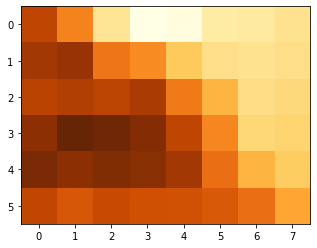

In [191]:
X_reconstructed = Z[:,:2]@A[:,:2].T
index = 0

# select the image and reshape it to show it
T_rec = X_reconstructed[index,:].reshape(grid_shape)
plt.imshow(T_rec, cmap='YlOrBr')
plt.show()

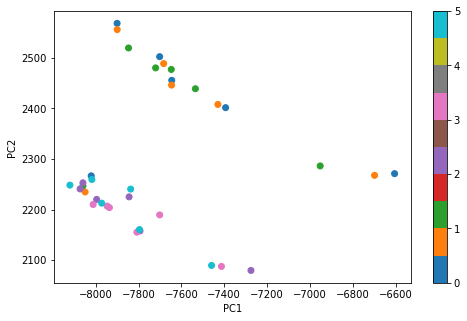

In [234]:
fig, ax = plt.subplots(figsize=(8,5))
im = ax.scatter(Z[:,0], Z[:,1],c=df.to_numpy()[:,0], cmap=plt.cm.get_cmap('tab10', 10), alpha=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
fig.colorbar(im)
plt.show()

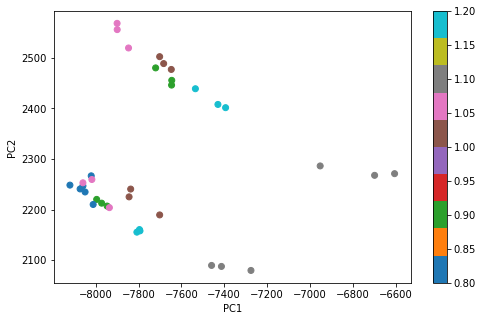

In [230]:
fig, ax = plt.subplots(figsize=(8,5))
im = ax.scatter(Z[:,0], Z[:,1],c=df.to_numpy()[:,1], cmap=plt.cm.get_cmap('tab10', 10), alpha=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
fig.colorbar(im)
plt.show()

/Users/alesspiscopo/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/Users/alesspiscopo/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/Users/alesspiscopo/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  # Remove the CWD from sys.path while we load stuff.


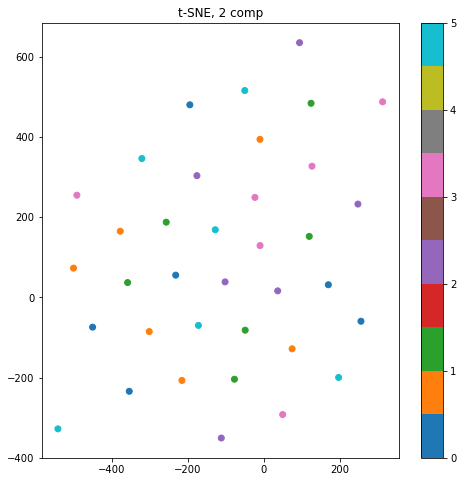

In [224]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components =2, perplexity = 30,init="pca")

X_2d = tsne.fit_transform(T)
X_2d.shape
fig, ax = plt.subplots(figsize=(8,8))

plt.title('t-SNE, 2 comp')
fig.colorbar(im)
im = ax.scatter(X_2d[:,0],X_2d[:,1],c=df.to_numpy()[:,0],cmap=plt.cm.get_cmap('tab10', 10), alpha=1)

In [92]:
from sklearn.manifold import Isomap

(36, 48)
(36, 2)


/Users/alesspiscopo/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  


TypeError: 'PathCollection' object is not callable

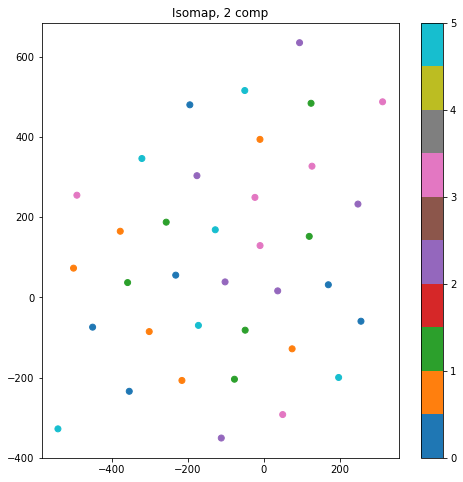

In [235]:
embedding = Isomap(n_components=2)
print(T.shape)
X_transformed = embedding.fit_transform(T)
print(X_transformed.shape)

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Isomap, 2 comp')
fig.colorbar(im)
im = ax.scatter(X_2d[:,0],X_2d[:,1],c=df.to_numpy()[:,0],cmap=plt.cm.get_cmap('tab10', 10), alpha=1)(X_transformed[:,0],X_transformed[:,1],c=df.to_numpy()[:,0:1],cmap=plt.cm.get_cmap('tab10', 10), alpha=1)

standard: 0.013 sec
ltsa: 0.009 sec
hessian: 0.013 sec
modified: 0.011 sec
ISO: 0.0063 sec
MDS: 0.019 sec
Spectral Embedding: 0.005 sec
t-SNE: 0.32 sec


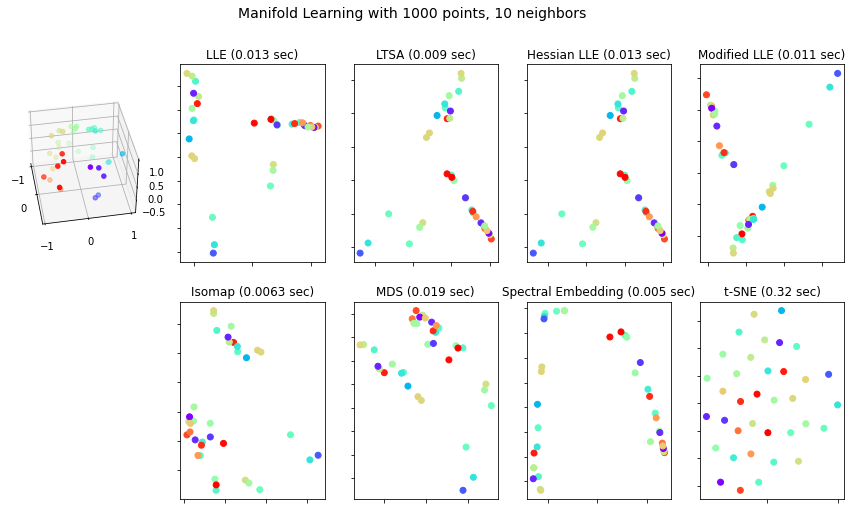

In [203]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.utils import check_random_state

# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import warnings

# Variables for manifold learning.
n_neighbors = 10
n_samples = 51

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

ax = fig.add_subplot(251, projection="3d")
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

# Perform Locally Linear Embedding Manifold learning
methods = ["standard", "ltsa", "hessian", "modified"]
labels = ["LLE", "LTSA", "Hessian LLE", "Modified LLE"]

for i, method in enumerate(methods):
    t0 = time()
    trans_data = (
        manifold.LocallyLinearEmbedding(
            n_neighbors=n_neighbors, n_components=2, method=method
        )
        .fit_transform(T)
        .T
    )
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis("tight")

# Perform Isomap Manifold learning.
t0 = time()
trans_data = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(T)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))

ax = fig.add_subplot(257)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("%s (%.2g sec)" % ("Isomap", t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Multi-dimensional scaling.
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1)
trans_data = mds.fit_transform(T).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(258)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Spectral Embedding.
t0 = time()
se = manifold.SpectralEmbedding(n_components=2, n_neighbors=n_neighbors)
trans_data = se.fit_transform(T).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(259)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform t-distributed stochastic neighbor embedding.
# TODO(1.2) Remove warning handling.
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore", message="The PCA initialization", category=FutureWarning
    )
    t0 = time()
    tsne = manifold.TSNE(
        n_components=2, init="pca", random_state=0, learning_rate="auto"
    )
    trans_data = tsne.fit_transform(T).T
    t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

plt.show()